In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import plotly.express as px
%matplotlib inline
drive.mount('/content/drive/')
%cd drive/MyDrive/Project/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Project/'
/content/drive/MyDrive/Project


In [ ]:
ames = pd.read_csv(r'Datasets/Ames_Housing_Dataset.csv', delimiter=',')

In [ ]:
ames.shape

(2930, 82)

## Data Explorarion and cleaning

In [ ]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
sns.kdeplot(ames['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

Checking for null values

In [ ]:
pd.DataFrame(ames.isnull().sum())

0
Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    490
...             ...
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0

[82 rows x 1 columns]

In [ ]:
before = ames.shape[1]
before_columns = ames.columns
ames.dropna(axis=1,inplace=True, how='any')
print('Dropped columns',before -ames.shape[1])
print('Columns Revoed are ', [i for  i in before_columns if i not in ames.columns])

Dropped columns 27
Columns Revoed are  ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


## Checking for duplicates

In [ ]:
ames.duplicated().any()

False

In [ ]:
ames.shape

(2930, 55)

In [ ]:
ames.describe()

Order           PID  MS SubClass       Lot Area  Overall Qual  \
count  2930.00000  2.930000e+03  2930.000000    2930.000000   2930.000000   
mean   1465.50000  7.144645e+08    57.387372   10147.921843      6.094881   
std     845.96247  1.887308e+08    42.638025    7880.017759      1.411026   
min       1.00000  5.263011e+08    20.000000    1300.000000      1.000000   
25%     733.25000  5.284770e+08    20.000000    7440.250000      5.000000   
50%    1465.50000  5.354536e+08    50.000000    9436.500000      6.000000   
75%    2197.75000  9.071811e+08    70.000000   11555.250000      7.000000   
max    2930.00000  1.007100e+09   190.000000  215245.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add   1st Flr SF   2nd Flr SF  \
count   2930.000000  2930.000000     2930.000000  2930.000000  2930.000000   
mean       5.563140  1971.356314     1984.266553  1159.557679   335.455973   
std        1.111537    30.245361       20.860286   391.890885   428.395715   
min        1.000000  1872.000000     1950.000000   334.000000     0.000000   
25%        5.000000  1954.000000     1965.000000   876.250000     0.000000   
50%        5.000000  1973.000000     1993.000000  1084.000000     0.000000   
75%        6.000000  2001.000000     2004.000000  1384.000000   703.750000   
max        9.000000  2010.000000     2010.000000  5095.000000  2065.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 28 columns]

### Exploratoty Analysis

In [ ]:
ames["LogSalePrice"] = ames['SalePrice'].apply(np.log)

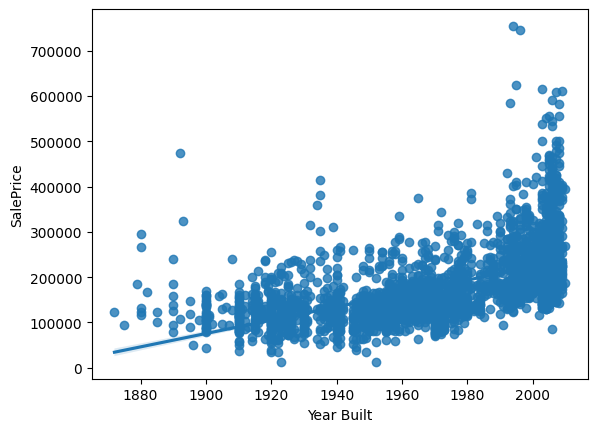

In [ ]:
sns.regplot(data=ames, x='Year Built', y='SalePrice');

positive linear relationship between the year the house was built and its sale price, indicating that newer houses tend to have higher sale prices. The shaded area represents the 95% confidence interval for the regression line

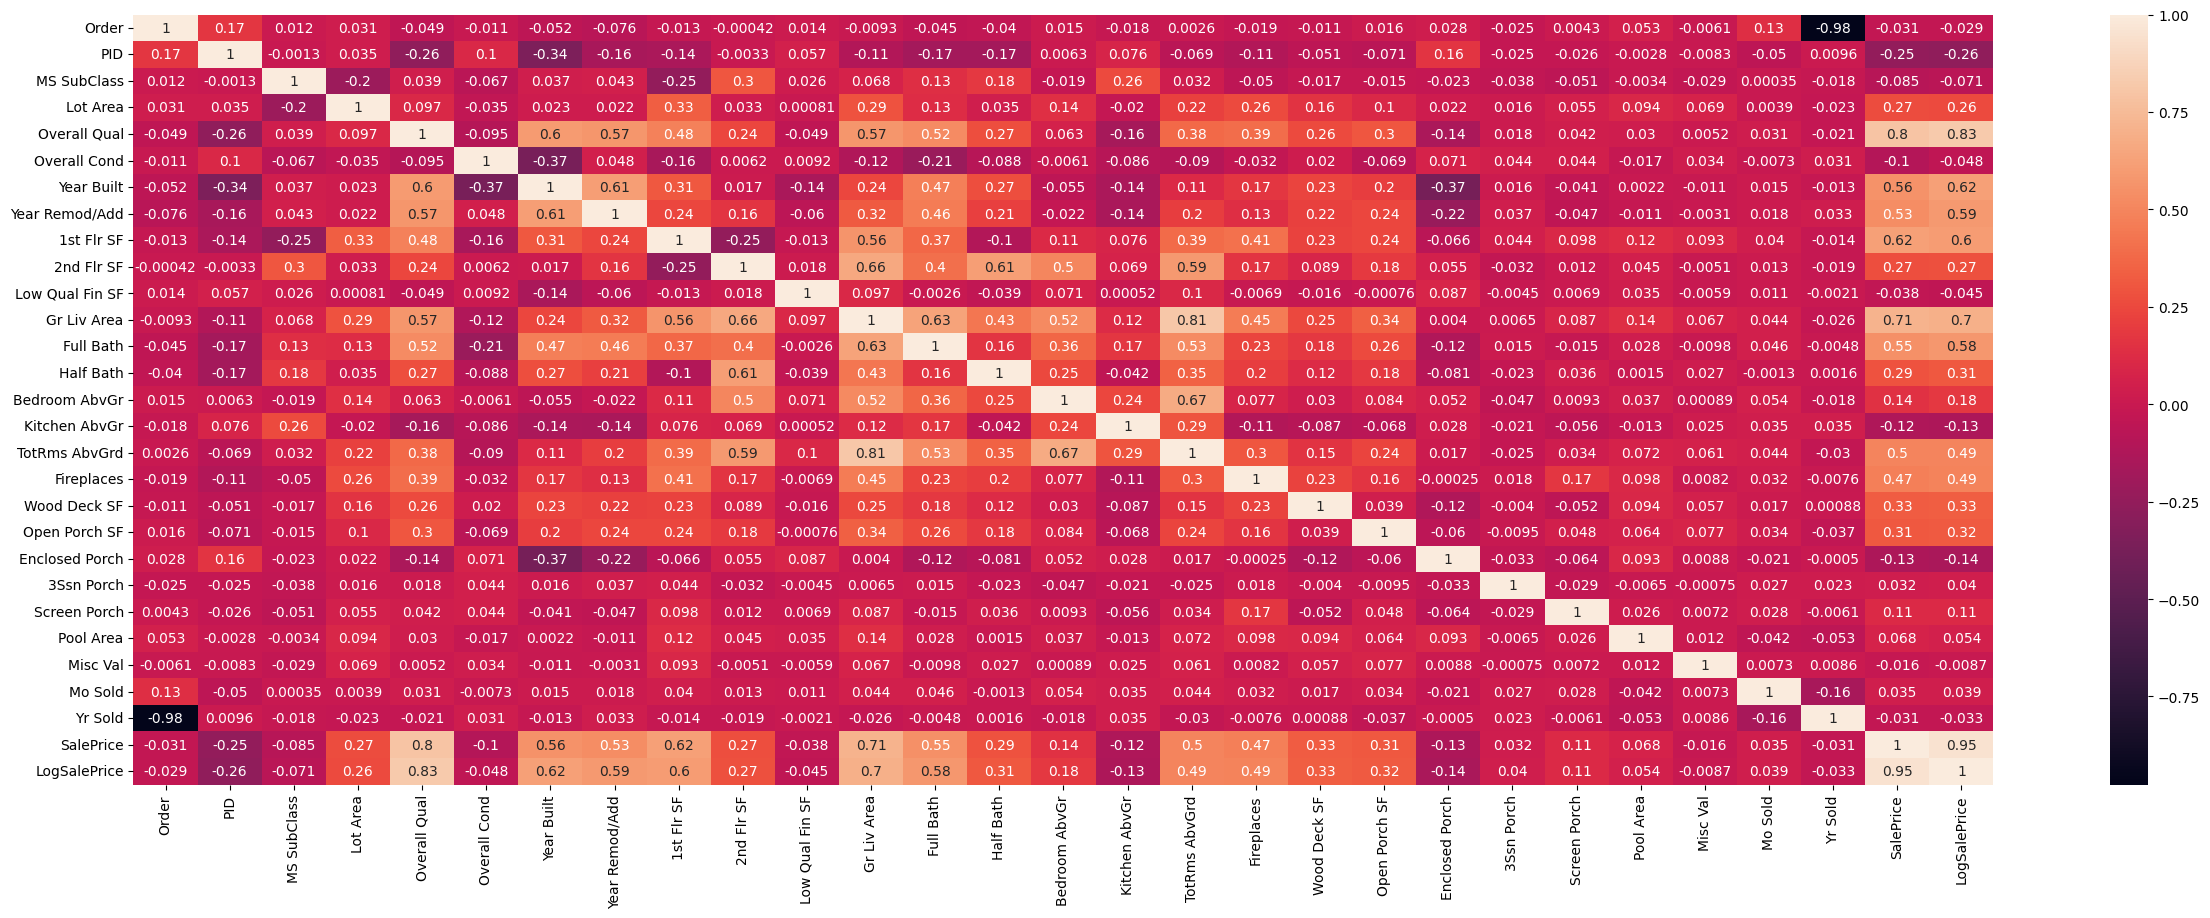

In [ ]:
plt.figure(figsize=(30,10 ))
sns.heatmap(ames.select_dtypes(['int','float']).corr(),annot=True);

In [ ]:
correlation = ames.corrwith(ames['SalePrice'])
correlation = correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice in Ames Data')
plt.show()

<ipython-input-127-0484eec27070>:1: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Pool Area, Mo Sold, 3Ssn Porch, Misc Val, Yr Sold, Order,Screen Porch,Bedroom AbvGr, Low Qual Fin SF, MS SubClass, Overall Cond, Kitchen AbvGr, Enclosed Porch, PID are lowly correlated features while log Sale Price is highly correlated to SalesPrice








In [ ]:
grouped = ames.groupby('Year Built')['SalePrice'].mean().reset_index()

# Create a line plot
fig = px.line(grouped, x='Year Built', y='SalePrice')

# Show the plot
fig.show()

In [ ]:
fig = px.scatter_3d(ames, x='Gr Liv Area', y='SalePrice', z='Overall Qual', color='Neighborhood')
fig.show()

In [ ]:
fig = px.pie(ames, names='Neighborhood', values='SalePrice')
fig.show()

In [ ]:
sns.countplot(data=ames, x='Neighborhood');
plt.xticks(rotation=90);
plt.title('Most proprties sold neighbourhoods in ames')

Text(0.5, 1.0, 'Most proprties sold neighbourhoods in ames')

In [ ]:
g = sns.FacetGrid(ames, col='Neighborhood', col_wrap=5)
g.map(sns.scatterplot, 'Gr Liv Area', 'SalePrice')

plt.show()

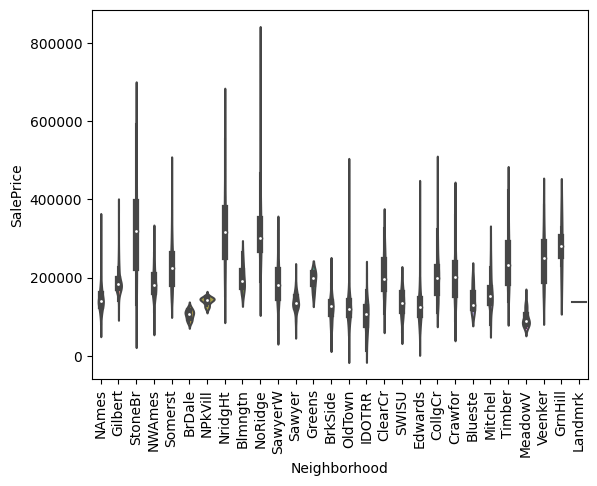

In [ ]:
sns.violinplot(data=ames, x='Neighborhood', y='SalePrice');
plt.xticks(rotation=90);

In [ ]:
fig = px.scatter(ames, x='Gr Liv Area', y='SalePrice', color='Neighborhood')
fig.show()

Top 10 most rich neigbourhoods

In [ ]:
grouped = ames.groupby('Neighborhood')['SalePrice'].sum().reset_index()
grouped = grouped.sort_values(by='SalePrice', ascending=False)
top_10 = grouped.head(10)
top_10.plot(x='Neighborhood', y='SalePrice', kind='bar')
plt.ylabel('SalesPrice in $1M')
plt.show()


10 most cheapest neighboods

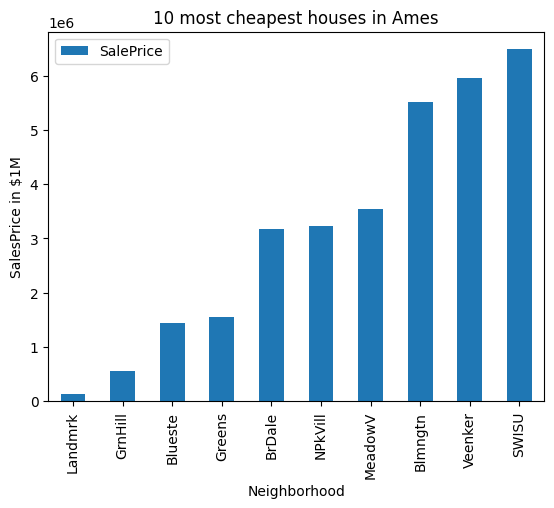

In [ ]:
grouped = ames.groupby('Neighborhood')['SalePrice'].sum().reset_index()
grouped = grouped.sort_values(by='SalePrice', ascending=True)
cheapest10 = grouped.head(10)
cheapest10.plot(x='Neighborhood', y='SalePrice', kind='bar')
plt.ylabel('SalesPrice in $1M')
plt.title('10 most cheapest houses in Ames')
plt.show()


Outlier Detection

In [ ]:
def remove_outliers_zscore(dataframe, columns, threshold=3):
    for column in columns:
        z_scores = np.abs((dataframe[column] - dataframe[column].mean()) / dataframe[column].std())
        dataframe = dataframe[z_scores < threshold]
    return dataframe
before =ames.shape
ames = remove_outliers_zscore(ames, ['SalePrice'])
print('Outlier rows in SalePrice column in ames data are',before[0]-ames.shape[0])


Outlier rows in SalePrice column in ames data are 45


Dropping Lowly correlated and highly correlated columns

In [ ]:
ames = ames.drop(['Pool Area','Mo Sold', '3Ssn Porch', 'Yr Sold', 'Order', 'Screen Porch', 'Low Qual Fin SF', 'MS SubClass', 'Overall Cond', 'Kitchen AbvGr', 'Enclosed Porch','PID', 'Bedroom AbvGr','LogSalePrice'],axis=1)

Splitting Training and Test set

In [ ]:
X = ames.select_dtypes(['int','float']).drop('SalePrice', axis=1)
y = ames['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1501)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


In [ ]:
X_train_scaled.shape,y_train.shape, (X_test_scaled.shape,y_test.shape)

((2163, 14), (2163,), ((722, 14), (722,)))

Implementing KNN regressor

In [ ]:
from KNN import KNNRegressor

In [ ]:
param_grid = {
    'n_neighbors': range(1, 6),
    'distance_type': [1, 2],
    'weighted': [True, False]
}

# Create a KNNRegressor object
knn_model = KNNRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and best score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=

In [ ]:
knn_score = grid_search.best_score_
knn_score

0.845333786949624

In [ ]:
train_score = []
test_score = []

neighbors = range(1, 8)
for n in neighbors:
    # Build the model
    knn = KNNRegressor(n_neighbors=n, distance_type = grid_search.best_params_['distance_type'], weighted = grid_search.best_params_['weighted'])
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

sns.lineplot(train_score, label='Training score')
sns.lineplot(test_score, label='Test score')
plt.xlabel('Number of Neighbors')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.title('Weighted KNN Manhattan Distance');

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=5, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=6, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=7, distance_type = 1, weighted = False)


## Applying Random Forest Regression

In [ ]:
p = int(np.ceil(X_train_scaled.shape[1]/3))

In [ ]:
from RandomForest import RandomForestRegressor

In [ ]:
param_grid = {
    'min_samples_split': [2, 10, 100],
    'max_depth': [5, 15, 25]
}

best_score = 0.0
best_params = {}

for s in param_grid['min_samples_split']:
    for d in param_grid['max_depth']:
        params = {'min_samples_split': 50, 'max_depth': d}
        rf = RandomForestRegressor(n_estimators=5, max_features=p, **params)
        rf.fit(X_train_scaled, y_train)
        current_score = rf.score_r2(X_test_scaled, y_test)
        if current_score > best_score:
            best_score = current_score
            best_params = params

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

Best hyperparameters: {'min_samples_split': 50, 'max_depth': 15}
Best Score: 0.8321603214467534


In [ ]:
random_forest_score=best_score

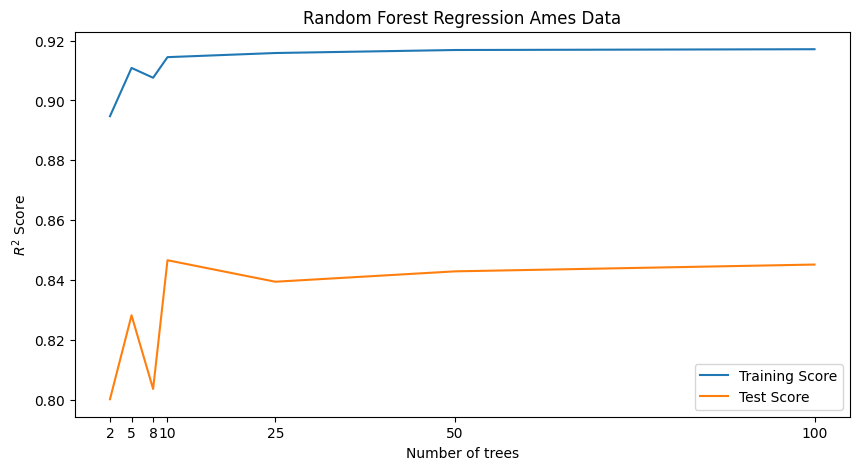

In [ ]:
train_score = []
test_score = []
num_trees = [2,5,8,10,25,50,100]
for n in num_trees:
    rf = RandomForestRegressor(n_estimators = n,
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled.to_numpy(), y_train.to_numpy())
    train_score.append(rf.score_r2(X_train_scaled.to_numpy(), y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=num_trees, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=num_trees, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Number of trees',
       ylabel = '$R^2$ Score',
       xticks =num_trees,
       title = 'Random Forest Regression Ames Data')
ax.legend();

In [ ]:
train_score = []
test_score = []
samples = [5, 50, 100, 150, 200]
for s in samples:
    rf = RandomForestRegressor(n_estimators = 10,
                               min_samples_split = s,
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled[:1000], y_train[:1000])
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=samples, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=samples, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Min Samples Split',
      ylabel = '$R^2$ Score',
      xticks =samples,
      title = 'Random Forest Regression')
ax.legend();

In [ ]:
train_score = []
test_score = []
depth = [2, 5, 8, 12]
for d in depth:
    rf = RandomForestRegressor(n_estimators = 10,
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = d,
                               max_features = p)
    rf.fit(X_train_scaled, y_train)
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=depth, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=depth, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Depth of Tree',
       ylabel = '$R^2$ Score',
       xticks = depth,
       title = 'Random Forest Regression for Ames dataset ')
ax.legend();

### Implementing Multilayer perceptron (NN)

In [ ]:
from MLP import MLP

In [ ]:
y_train_mlp = y_train
y_test_mlp = y_test

In [ ]:
n_inputs = X_train.shape[1]
n_hidden1 = 30
n_hidden2 = 30
n_outputs = 1
mlp = MLP(n_inputs, n_hidden1, n_hidden2, n_outputs,activation='relu')
mlp.fit(X_train.to_numpy(), np.array(y_train_mlp))
y_pred_test = mlp.predict(X_test)
test_mse = mlp.mse_loss(np.array(y_test_mlp), y_pred_test.to_numpy())
print(f'Test MSE: {test_mse:.4f}')


epochs = 0 ============> loss 38989574553.38765 
epochs = 50 ============> loss 1.0924850981134907e+54 
epochs = 100 ============> loss 1.4488488853344694e+53 
epochs = 150 ============> loss 1.9214569573166557e+52 
epochs = 200 ============> loss 2.5482276835021816e+51 
epochs = 250 ============> loss 3.3794482370477507e+50 
epochs = 300 ============> loss 4.4818092436657944e+49 
epochs = 350 ============> loss 5.943755514999572e+48 
epochs = 400 ============> loss 7.882582167462329e+47 
epochs = 450 ============> loss 1.0453845463527558e+47 
epochs = 500 ============> loss 1.3863843427654067e+46 
epochs = 550 ============> loss 1.838616758369875e+45 
epochs = 600 ============> loss 2.438365379556637e+44 
epochs = 650 ============> loss 3.233749337459424e+43 
epochs = 700 ============> loss 4.28858401008821e+42 
epochs = 750 ============> loss 5.6875010683523815e+41 
epochs = 800 ============> loss 7.542738658358284e+40 
epochs = 850 ============> loss 1.0003146511016624e+40 
epochs =

In [ ]:
from sklearn.metrics import r2_score
test_r2 = r2_score(np.array(y_test), y_pred_test)
print(f'Test R-squared score: {test_r2:.4f}')

Test R-squared score: -5111728150263324038999834624.0000


In [ ]:
param_grid = { 'n_hidden1': [10, 20], 'n_hidden2': [10, 20],
              'learning_rate': [0.01, 0.1], 'n_epochs': [100, 2000] }
best_score = float('-inf')
best_params = {}

for h1 in param_grid['n_hidden1']:
    for h2 in param_grid['n_hidden2']:
        for lr in param_grid['learning_rate']:
            for ne in param_grid['n_epochs']:

                mlp = MLP(n_inputs, h1, h2, n_outputs,activation='relu')
                mlp.fit(X_train_scaled.to_numpy(), np.array(y_train), learning_rate=lr, n_epochs=ne)
                y_pred_test = mlp.predict(X_test_scaled)
                current_score = r2_score(np.array(y_test), y_pred_test.to_numpy())
                if current_score > best_score:
                    best_score = current_score
                    best_params = {'n_hidden1': h1, 'n_hidden2': h2, 'learning_rate': lr, 'n_epochs': ne}
                print(f'For n_hidden1={h1}, n_hidden2={h2}, learning_rate={lr}, n_epochs={ne}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')

epochs = 0 ============> loss 35968814314.80155 
epochs = 50 ============> loss 2.3238595863999052e+16 
For n_hidden1=10, n_hidden2=10, learning_rate=0.01, n_epochs=100, the current score is -675102.0220
epochs = 0 ============> loss 35968814314.80155 
epochs = 50 ============> loss 2.3238595863999052e+16 
epochs = 100 ============> loss 3081896396200393.5 
epochs = 150 ============> loss 408723864476929.2 
epochs = 200 ============> loss 54208910489710.64 
epochs = 250 ============> loss 7193294733876.805 
epochs = 300 ============> loss 958104652219.7517 
epochs = 350 ============> loss 131196512671.02286 
epochs = 400 ============> loss 21532322438.31389 
epochs = 450 ============> loss 6988706232.094292 
epochs = 500 ============> loss 5059938309.721715 
epochs = 550 ============> loss 4804145964.432617 
epochs = 600 ============> loss 4770222897.1991 
epochs = 650 ============> loss 4765724035.088002 
epochs = 700 ============> loss 4765127397.992797 
epochs = 750 ============> lo

In [ ]:
mlp_score=best_score

In [ ]:
train_losses = []
test_mses = []
n_epochs = 5000
learning_rate=best_params['learning_rate']
# Train the MLP for a fixed number of epochs
for epoch in range(1,n_epochs+1):
    # Forward pass: compute the predictions of the MLP on the training set
    y_pred, z1, a1, z2, a2 = mlp.forward_pass(X_train_scaled.to_numpy())

    # Compute the training loss
    loss = mlp.mse_loss(y_train, y_pred)
    train_losses.append(loss)

    # Backward pass: compute the gradients and update the weights and biases of the MLP
    d_z3, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3 = mlp.backward_pass(X_train_scaled.to_numpy(), y_train.to_numpy(), y_pred, z1, a1, z2, a2)
    mlp.update_weights_biases(learning_rate, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3)

    # Evaluate the trained MLP on the test set
    y_pred_test = mlp.predict(X_test_scaled)

    test_mse = mlp.mse_loss(y_test, y_pred_test.to_numpy())
    test_mses.append(test_mse)

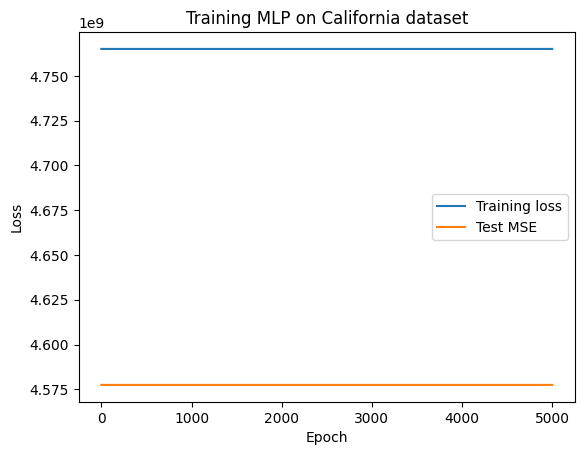

In [ ]:
plt.plot(train_losses, label='Training loss');
plt.plot(test_mses, label='Test MSE');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.title('Training MLP on California dataset')
plt.legend();

Implementing Kernel Ridge regression

In [ ]:
from KernelizedRidge import KernelizedRidgeRegression

In [ ]:
param_grid = {
    'kernel': ['linear', 'polynomial', 'rbf'],
    'alpha': [0.1, 1, 10, 50],
    'degree': [2, 3, 4]
}

best_score = 0.0
best_params = {}
score_saver = {}

for k in param_grid['kernel']:
    score_saver[k] = {}
    for a in param_grid['alpha']:
        score_saver[k][a] = {}
        for d in param_grid['degree']:
            rr = KernelizedRidgeRegression(alpha=a, kernel=k, degree=d)
            rr.fit(X_train_scaled, y_train.to_numpy())
            current_score = rr.score(X_test_scaled, y_test)
            score_saver[k][a][d] = current_score
            if current_score > best_score:
                best_score = current_score
                best_params = {'alpha': a, 'kernel': k, 'degree': d}
            print(f'For kernel={k}, alpha={a}, and degree={d}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')
krr_model_score= best_score

For kernel=linear, alpha=0.1, and degree=2, the current score is 0.7814
For kernel=linear, alpha=0.1, and degree=3, the current score is 0.7814
For kernel=linear, alpha=0.1, and degree=4, the current score is 0.7814
For kernel=linear, alpha=1, and degree=2, the current score is 0.7799
For kernel=linear, alpha=1, and degree=3, the current score is 0.7799
For kernel=linear, alpha=1, and degree=4, the current score is 0.7799
For kernel=linear, alpha=10, and degree=2, the current score is 0.7587
For kernel=linear, alpha=10, and degree=3, the current score is 0.7587
For kernel=linear, alpha=10, and degree=4, the current score is 0.7587
For kernel=linear, alpha=50, and degree=2, the current score is 0.7170
For kernel=linear, alpha=50, and degree=3, the current score is 0.7170
For kernel=linear, alpha=50, and degree=4, the current score is 0.7170
For kernel=polynomial, alpha=0.1, and degree=2, the current score is 0.8186
For kernel=polynomial, alpha=0.1, and degree=3, the current score is 0.8

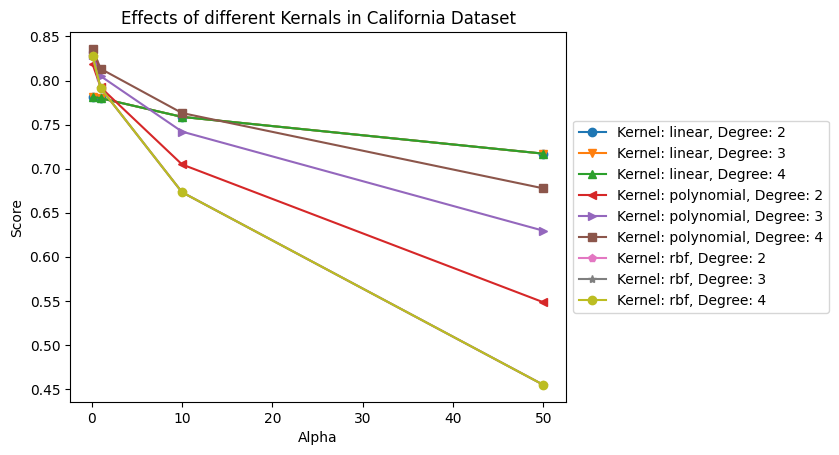

In [ ]:
fig, ax = plt.subplots()
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']
i = 0
for k in param_grid['kernel']:
    for d in param_grid['degree']:
        scores = [score_saver[k][a][d] for a in param_grid['alpha']]
        ax.plot(param_grid['alpha'], scores, label=f'Kernel: {k}, Degree: {d}', marker=markers[i])
        i = (i + 1) % len(markers)
ax.set_xlabel('Alpha')
ax.set_ylabel('Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Effects of different Kernals in California Dataset')
plt.show()


In [ ]:
temp = []
for k in param_grid['kernel']:
    for d in param_grid['degree']:
        for a in param_grid['alpha']:
            score = score_saver[k][a][d]
            temp.append({'Kernel': k, 'Degree': d, 'Alpha': a, 'Score': score})
df = pd.DataFrame(temp).pivot_table(index=['Kernel', 'Degree'], columns='Alpha', values='Score')
df

Alpha                  0.1       1.0       10.0      50.0
Kernel     Degree                                        
linear     2       0.781437  0.779919  0.758723  0.716996
           3       0.781437  0.779919  0.758723  0.716996
           4       0.781437  0.779919  0.758723  0.716996
polynomial 2       0.818581  0.792132  0.704756  0.548271
           3       0.828666  0.804951  0.742017  0.629503
           4       0.835876  0.813291  0.763110  0.677603
rbf        2       0.827815  0.791337  0.673202  0.454514
           3       0.827815  0.791337  0.673202  0.454514
           4       0.827815  0.791337  0.673202  0.454514

In [ ]:
random_forest_score = 0.8321603214467534
mlp_score = -0.0007


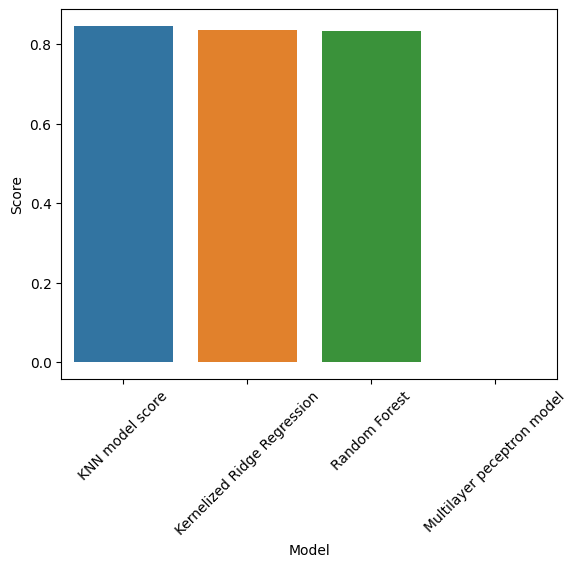

In [ ]:
final_comparisions = {'Kernelized Ridge Regression': krr_model_score, 'Multilayer peceptron model': mlp_score, 'Random Forest': random_forest_score, 'KNN model score': knn_score}

d = []
for model, score in final_comparisions.items():
    d.append({'Model': model, 'Score': score})

# Sort the data by Score in descending order
d = sorted(d, key=lambda x: x['Score'], reverse=True)

df = pd.DataFrame(d)

# Create a bar plot with one bar for each model
sns.barplot(data=df, x='Model', y='Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df

Model     Score
0              KNN model score  0.845334
1  Kernelized Ridge Regression  0.835876
2                Random Forest  0.832160
3   Multilayer peceptron model -0.000700

Building a Pipeline

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', KNNRegressor(distance_type=1, n_neighbors=5, weighted=False))
])

KNNRegressor(n_neighbors=5, distance_type = 1, weighted = False)


In [ ]:
pipe.fit(X_train.to_numpy(), np.array(y_train))

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', <KNN.KNNRegressor object at 0x7acd8ef1f850>)])

In [ ]:
y_pred = pipe.predict(X_test.to_numpy())

In [ ]:
print(f'R^2 score: ',r2_score(y_test, y_pred))

R^2 score:  0.8171912400427228


In [ ]:
class InductiveConformalRegressor:
    def __init__(self, model):
        self.model = model

    def fit(self, X_train, y_train, X_cal, y_cal):
        # Fit underlying model to proper training set
        self.model.fit(X_train, y_train)

        # Calculate nonconformity scores for calibration set
        y_pred_cal = self.model.predict(X_cal)
        self.nc_scores_ = np.abs(y_pred_cal - y_cal)

    def predict(self, X, significance=0.05):
        # Make predictions using underlying model
        y_pred = self.model.predict(X)

        # Calculate prediction intervals
        n = len(self.nc_scores_)
        k = int(np.ceil(significance * n))
        threshold = np.partition(self.nc_scores_, -k)[-k]
        interval = np.abs(y_pred - threshold)
        lower = y_pred - interval
        upper = y_pred + interval


        return lower, upper


Splitting further into calibration sets

In [ ]:
X_train, X_cal, y_train, y_cal = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [ ]:
icp = InductiveConformalRegressor(pipe)
icp.fit(X_train.to_numpy(), np.array(y_train), X_cal.to_numpy(), np.array(y_cal))

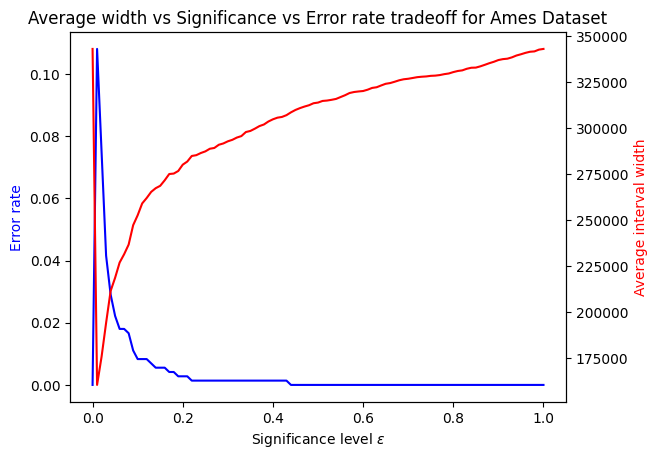

In [ ]:
significance_levels = np.linspace(0, 1, 101)
error_rate = []
avg_width = []
# Calculating error rate and average interval width for each significance level
for significance in significance_levels:
    lower, upper = icp.predict(X_test.to_numpy(), significance=significance)

    # Calculating the error rate
    in_interval = np.logical_and(lower <= y_test, y_test <= upper)
    error_rate.append(1 - np.mean(in_interval))

    # Calculating average interval width
    width = upper - lower
    avg_width.append(np.mean(width))

# Plotting error rate and average interval width tradeoff with significance level
fig, ax1 = plt.subplots()
ax1.plot(significance_levels, error_rate, label='Error rate', color='b')
ax1.set_xlabel('Significance level $\epsilon$')
ax1.set_ylabel('Error rate', color='b')
ax2 = ax1.twinx()
ax2.plot(significance_levels, avg_width, label='Average interval width', color='r')
ax2.set_ylabel('Average interval width', color='r')
plt.title('Average width vs Significance vs Error rate tradeoff for Ames Dataset')
plt.show()
